In [ ]:
# | hide
from geneorder.core import *

# geneorder

> The Python **Gene Order** plotter

This package was born out of my continuous efforts to write streamlined code to plot Hox gene clusters. It seems like this is a task I will be performing many times, and there don't seem to be too many tools out there, so I wrote my own. This is my `matplotlib`-based answer, and I hope that it is useful to you, too.

## Input

Generally, the package expects you to have, at least, knowledge of the gene IDs that you want to visualize, and knowledge of their coordinates in the genome. This can be manually encoded or come in table form - crucially, it can be read from a GFF3 file.

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/galicae/geneorder.git
```

or from [pypi][pypi]


```sh
$ pip install geneorder
```

[repo]: https://github.com/galicae/geneorder
[docs]: https://galicae.github.io/geneorder/
[pypi]: https://pypi.org/project/geneorder/

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [pypi][pypi].

[repo]: https://github.com/galicae/geneorder
[docs]: https://galicae.github.io/geneorder/
[pypi]: https://pypi.org/project/geneorder/

## How to use

The most basic `geneorder` use case is when you have a list of genes that are co-linear and would
like to plot them in their chromosomal context. The least information that is needed for that is

- the chromosome name
- the gene IDs/names
- the starts/ends of all genes
- the strand and orientation of the genes

In [ ]:
import pandas as pd
from geneorder.core import plot_synteny_schematic

In [ ]:
gene_dict = {
    'gene_name': ['Hox1', 'Hox2', 'Hox3', 'Hox4', 'Hox5', 'Hox6', 'Hox7', 'Hox8', 'Hox10'],
    'gene_id': ['PB.8615', 'g9718', 'PB.8616', 'g9720', 'g9721', 'PB.8617', 'g9723', 'g9724', 'g9725'],
    'start': [1927066, 1998922, 2058396, 2195412, 2351936, 2373415, 2565196, 2916314, 2986021],
    'end': [1936157, 2024148, 2065953, 2206712, 2354374, 2375678, 2594468, 2926445, 2996225],
}

minimal = pd.DataFrame(gene_dict)
minimal['seqid'] = 'pseudochrom_56'
minimal['strand'] = '-'

In [ ]:
minimal

,gene_name,gene_id,start,end,seqid,strand
0,Hox1,PB.8615,1927066,1936157,pseudochrom_56,-
1,Hox2,g9718,1998922,2024148,pseudochrom_56,-
2,Hox3,PB.8616,2058396,2065953,pseudochrom_56,-
3,Hox4,g9720,2195412,2206712,pseudochrom_56,-
4,Hox5,g9721,2351936,2354374,pseudochrom_56,-
5,Hox6,PB.8617,2373415,2375678,pseudochrom_56,-
6,Hox7,g9723,2565196,2594468,pseudochrom_56,-
7,Hox8,g9724,2916314,2926445,pseudochrom_56,-
8,Hox10,g9725,2986021,2996225,pseudochrom_56,-


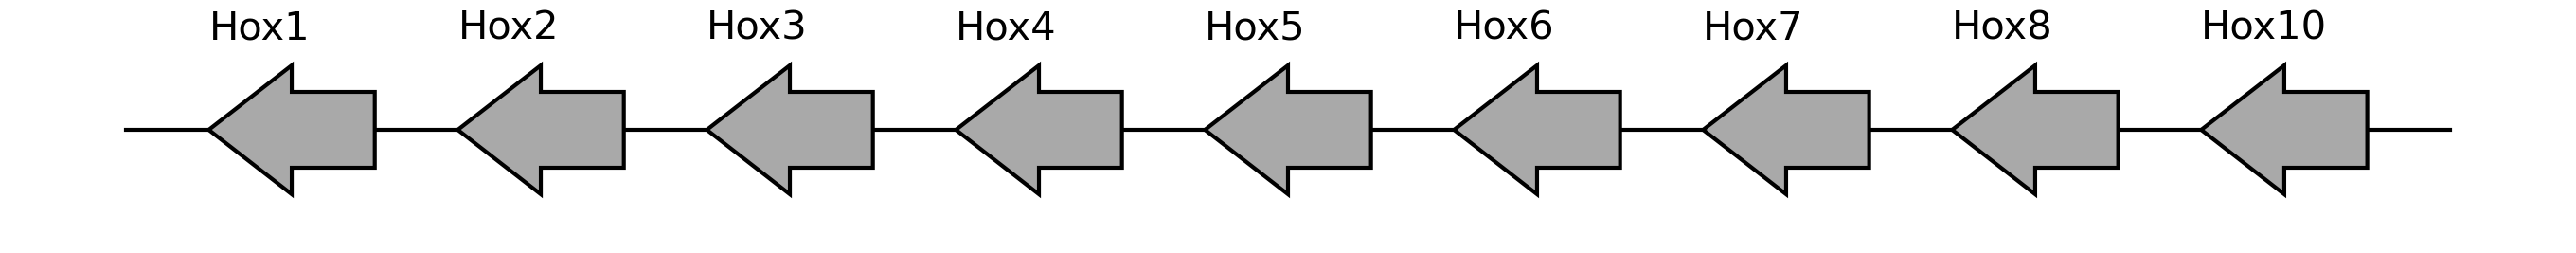

In [ ]:
plot_synteny_schematic(minimal)

The plot can be customized, e.g. by including color:

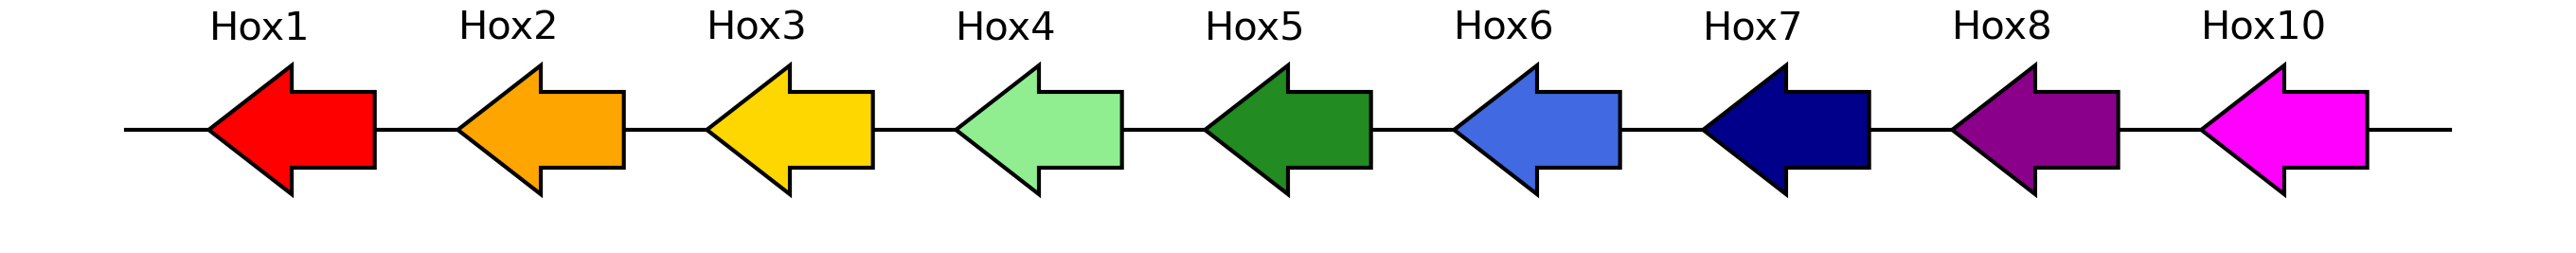

In [ ]:
minimal['color'] = [
    "red",
    "orange",
    "gold",
    "lightgreen",
    "forestgreen",
    "royalblue",
    "darkblue",
    "darkmagenta",
    "magenta",
]

plot_synteny_schematic(minimal)

We can also edit the dataframe to indicate missing genes:

In [ ]:
from geneorder import util

In [ ]:
minimal = util.insert_gap(
    minimal,
    "Hox8",
    "Hox10",
    "gene_name",
    no_gaps=1,
    purge_columns=["gene_id", "color"],
)

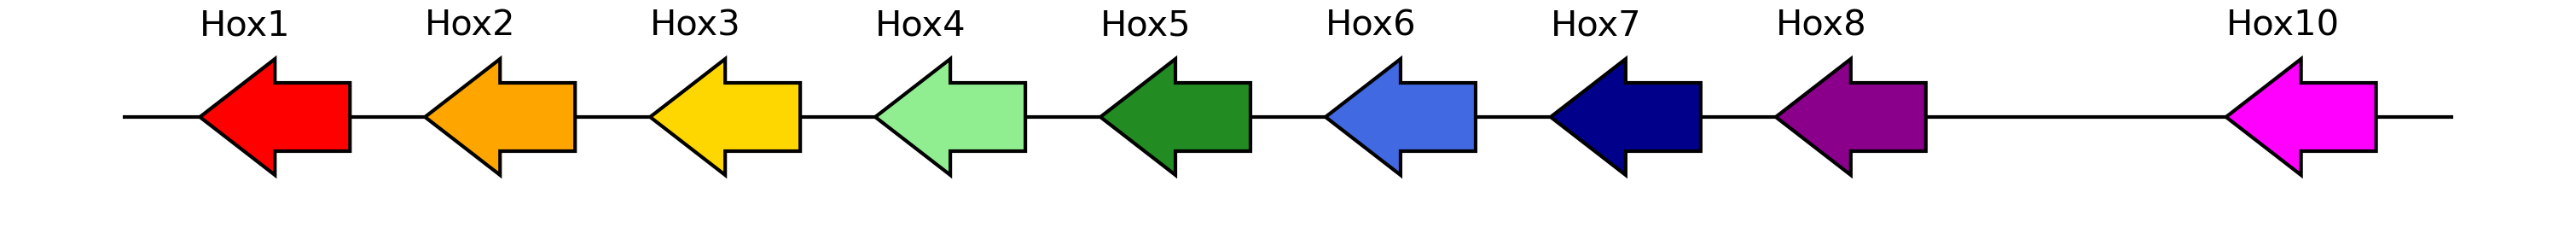

In [ ]:
plot_synteny_schematic(minimal)

For more details, please refer to the [documentation][docs].

[docs]: https://galicae.github.io/geneorder/